Look at ExifOffset -- what is this? Correlates to most of the data.


# Importing Dependencies and Data

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
umap = pd.read_csv('umap_meta_df.csv')
umap.head()

,Unnamed: 0,Filename,Image Size,Image Height,Image Width,Image Format,Image Mode,Image is Animated,Frames in Image,ResolutionUnit,...,umap_small_1,umap_large_0,umap_large_1,min_image_length,max_image_length,requires_rotate,aspect_ratio,resized_all,resized_small,resized_large
0,AdamOld2_20191019_130201.jpg,../Adam_Old_2/20191019_130201.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,False,1,2.0,...,2.590604,NaN,NaN,2268,4032,False,0.5625,True,True,True
1,AdamOld2_20191019_130841.jpg,../Adam_Old_2/20191019_130841.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,False,1,2.0,...,2.847890,NaN,NaN,2268,4032,False,0.5625,True,True,True
2,AdamOld2_20191019_141404.jpg,../Adam_Old_2/20191019_141404.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,False,1,2.0,...,3.349505,NaN,NaN,2268,4032,False,0.5625,True,True,True
3,AdamOld2_20191019_142208.jpg,../Adam_Old_2/20191019_142208.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,False,1,2.0,...,3.817596,NaN,NaN,2268,4032,False,0.5625,True,True,True
4,AdamOld2_20191019_142219.jpg,../Adam_Old_2/20191019_142219.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,False,1,2.0,...,2.960602,NaN,NaN,2268,4032,False,0.5625,True,True,True


In [73]:
umap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         244 non-null    object 
 1   Filename           244 non-null    object 
 2   Image Size         244 non-null    object 
 3   Image Height       244 non-null    int64  
 4   Image Width        244 non-null    int64  
 5   Image Format       244 non-null    object 
 6   Image Mode         244 non-null    object 
 7   Image is Animated  244 non-null    bool   
 8   Frames in Image    244 non-null    int64  
 9   ResolutionUnit     219 non-null    float64
 10  ExifOffset         219 non-null    float64
 11  Make               212 non-null    object 
 12  Model              212 non-null    object 
 13  Software           212 non-null    object 
 14  Orientation        219 non-null    float64
 15  DateTime           212 non-null    object 
 16  YCbCrPositioning   182 non

In [74]:
umap.drop(['Image is Animated', 'ResolutionUnit', 'Frames in Image', 'YCbCrPositioning', 'XResolution', 'YResolution', 'TileWidth', 'TileLength'], axis=1, inplace=True)

In [113]:
umap['image_increase_all'] = np.where((umap['Image Height'] > umap['Image Width']), 5312/ umap['Image Height'], 5312 / umap['Image Width'])
umap['image_increase_large'] = np.where((umap['Image Height'] > umap['Image Width']), 4624/ umap['Image Height'], 4624 / umap['Image Width'])
umap.head()

,Unnamed: 0,Filename,Image Size,Image Height,Image Width,Image Format,Image Mode,ExifOffset,Make,Model,...,umap_large_1,min_image_length,max_image_length,requires_rotate,aspect_ratio,resized_all,resized_small,resized_large,image_increase_all,image_increase_large
0,AdamOld2_20191019_130201.jpg,../Adam_Old_2/20191019_130201.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,226.0,samsung,SM-G973F,...,NaN,2268,4032,False,0.5625,True,True,True,1.31746,1.146825
1,AdamOld2_20191019_130841.jpg,../Adam_Old_2/20191019_130841.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,226.0,samsung,SM-G973F,...,NaN,2268,4032,False,0.5625,True,True,True,1.31746,1.146825
2,AdamOld2_20191019_141404.jpg,../Adam_Old_2/20191019_141404.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,226.0,samsung,SM-G973F,...,NaN,2268,4032,False,0.5625,True,True,True,1.31746,1.146825
3,AdamOld2_20191019_142208.jpg,../Adam_Old_2/20191019_142208.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,226.0,samsung,SM-G973F,...,NaN,2268,4032,False,0.5625,True,True,True,1.31746,1.146825
4,AdamOld2_20191019_142219.jpg,../Adam_Old_2/20191019_142219.jpg,"(4032, 2268)",2268,4032,JPEG,RGB,226.0,samsung,SM-G973F,...,NaN,2268,4032,False,0.5625,True,True,True,1.31746,1.146825


# Correlation & Pairplots

In [43]:
numeric_umap_df = umap.select_dtypes(include=['float64', 'int64'])
numeric_umap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Image Height      244 non-null    int64  
 1   Image Width       244 non-null    int64  
 2   Frames in Image   244 non-null    int64  
 3   ResolutionUnit    219 non-null    float64
 4   ExifOffset        219 non-null    float64
 5   Orientation       219 non-null    float64
 6   YCbCrPositioning  182 non-null    float64
 7   XResolution       0 non-null      float64
 8   YResolution       0 non-null      float64
 9   ImageWidth        134 non-null    float64
 10  ImageLength       134 non-null    float64
 11  GPSInfo           89 non-null     float64
 12  TileWidth         1 non-null      float64
 13  TileLength        1 non-null      float64
 14  umap_all_0        244 non-null    float64
 15  umap_all_1        244 non-null    float64
 16  umap_small_0      94 non-null     float64
 1

In [49]:
numeric_cols_interest = ['Image Height',
 'Image Width',
 'ExifOffset',
 'Orientation',
 'GPSInfo',
 'umap_all_0',
 'umap_all_1',
 'umap_small_0',
 'umap_small_1',
 'umap_large_0',
 'umap_large_1']

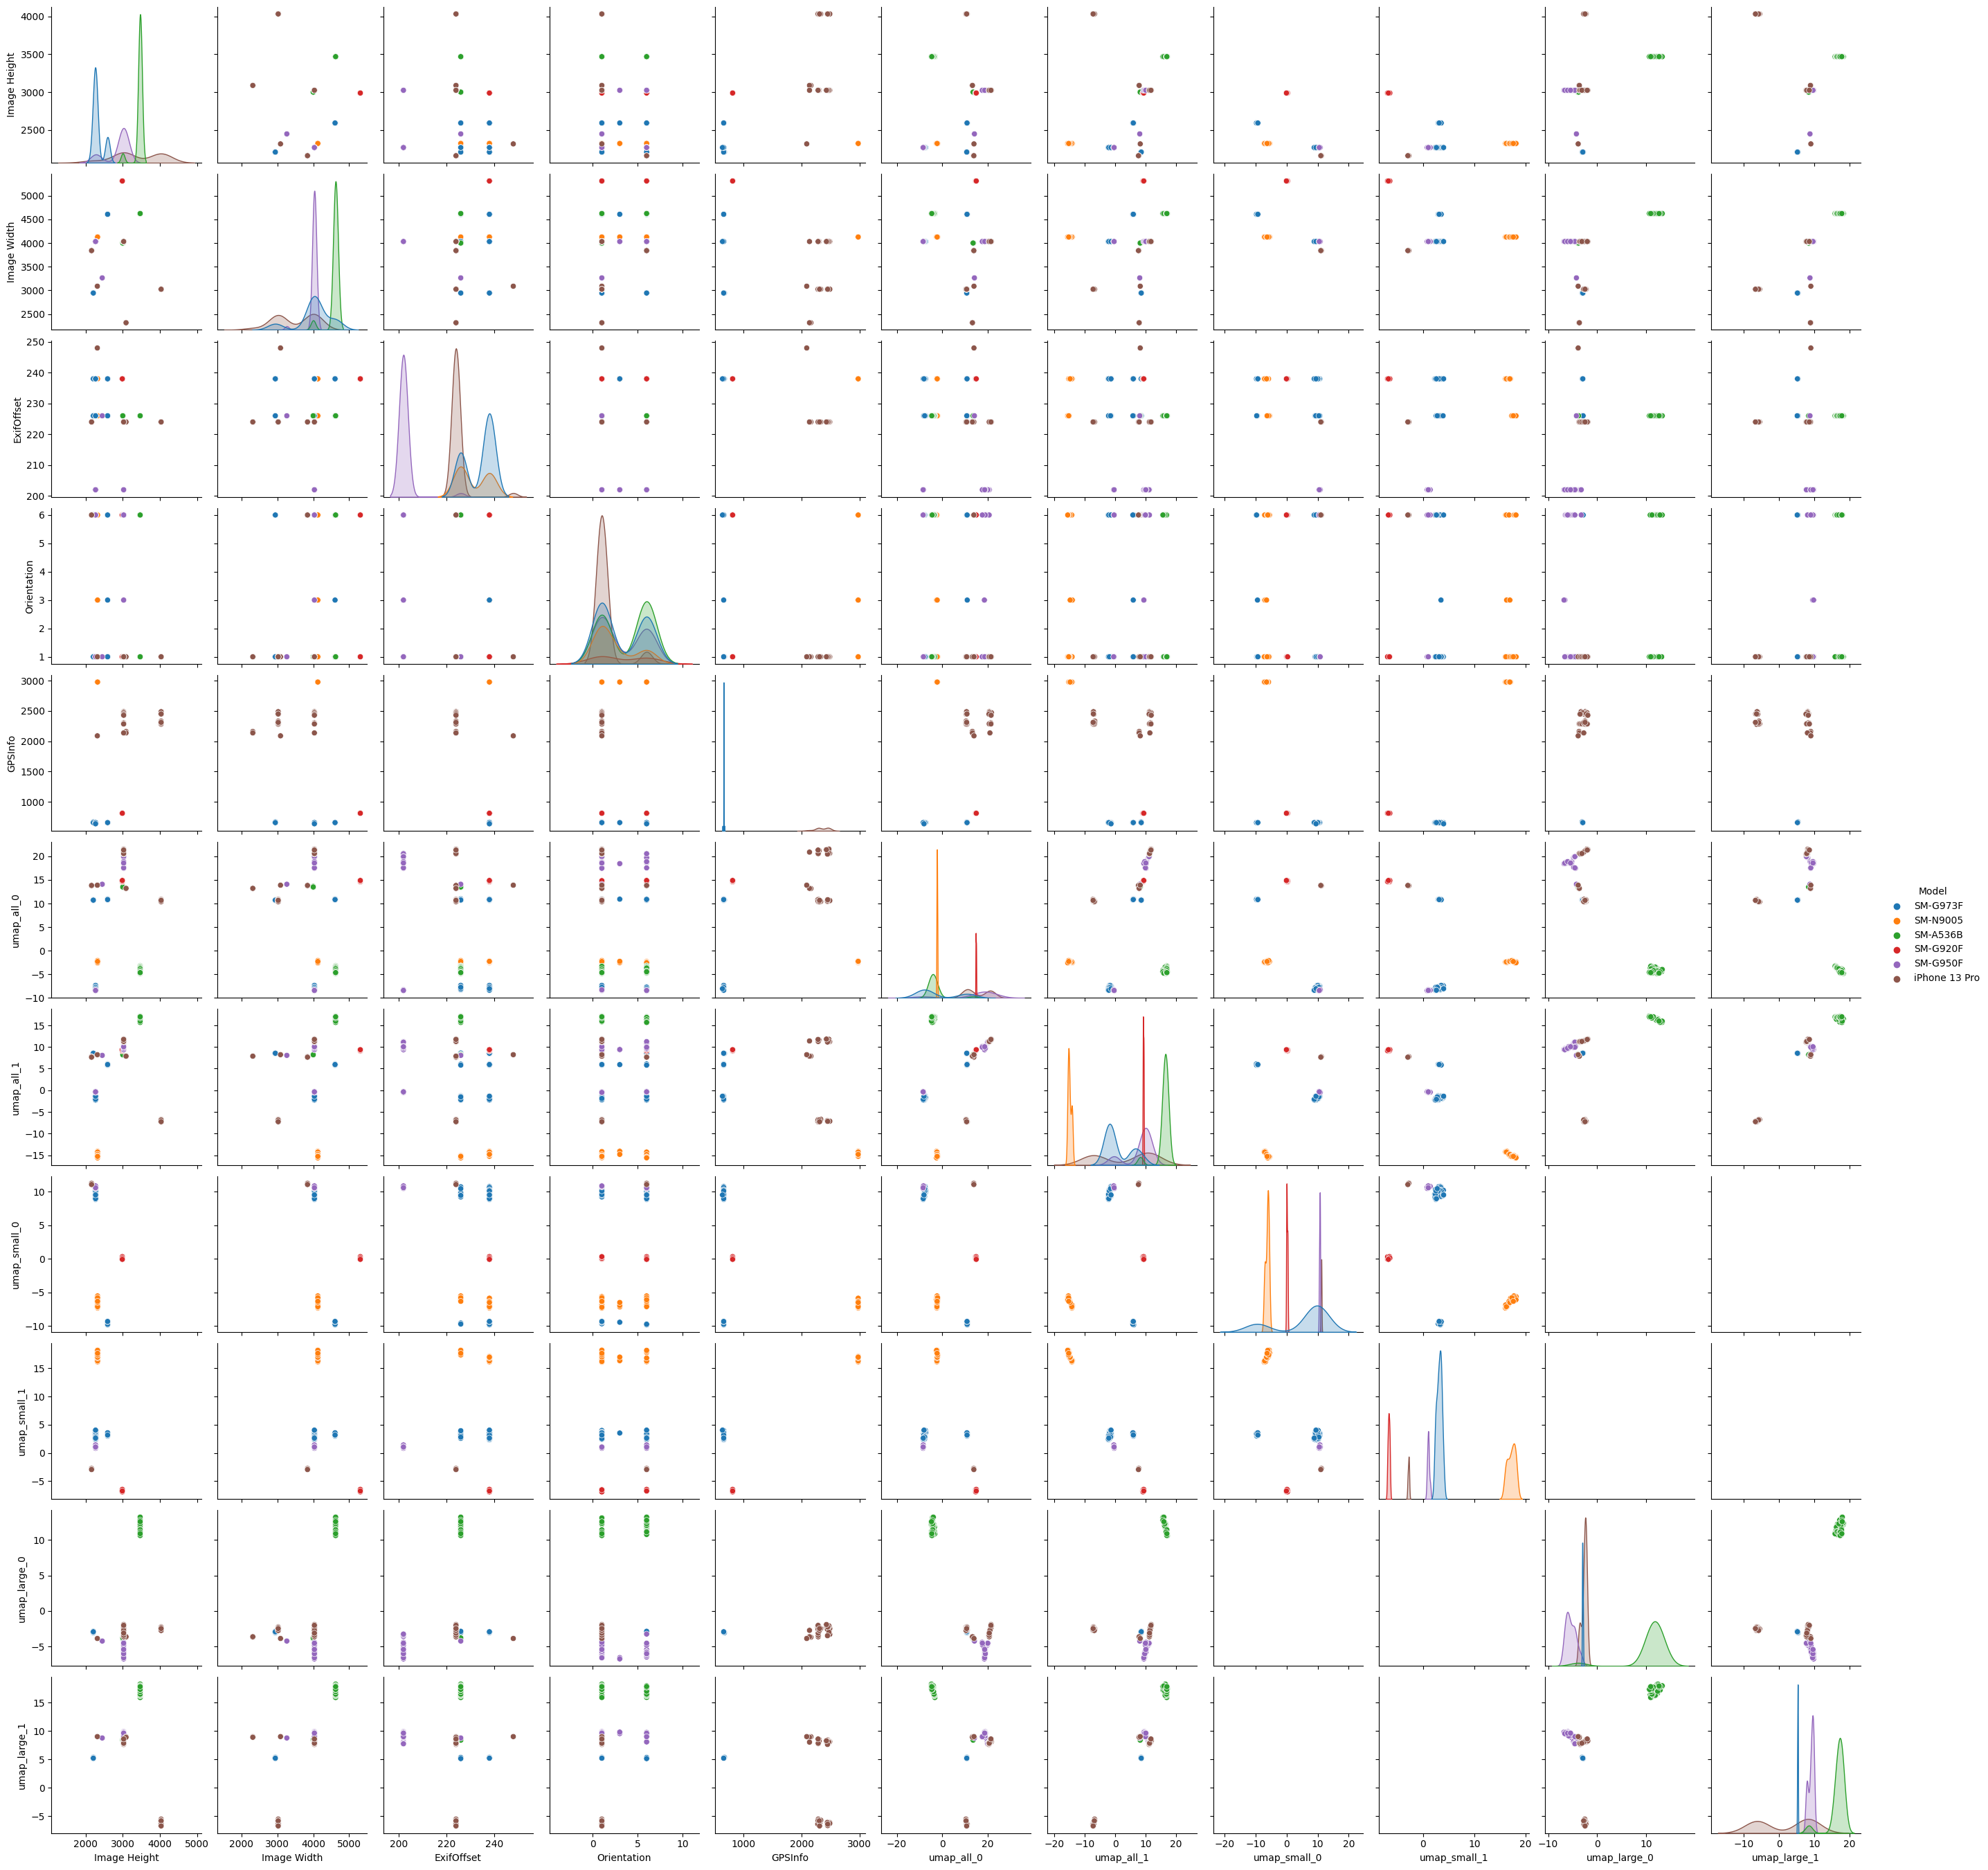

In [54]:
sns.pairplot(umap, vars=numeric_cols_interest, hue='Model')

<AxesSubplot:>

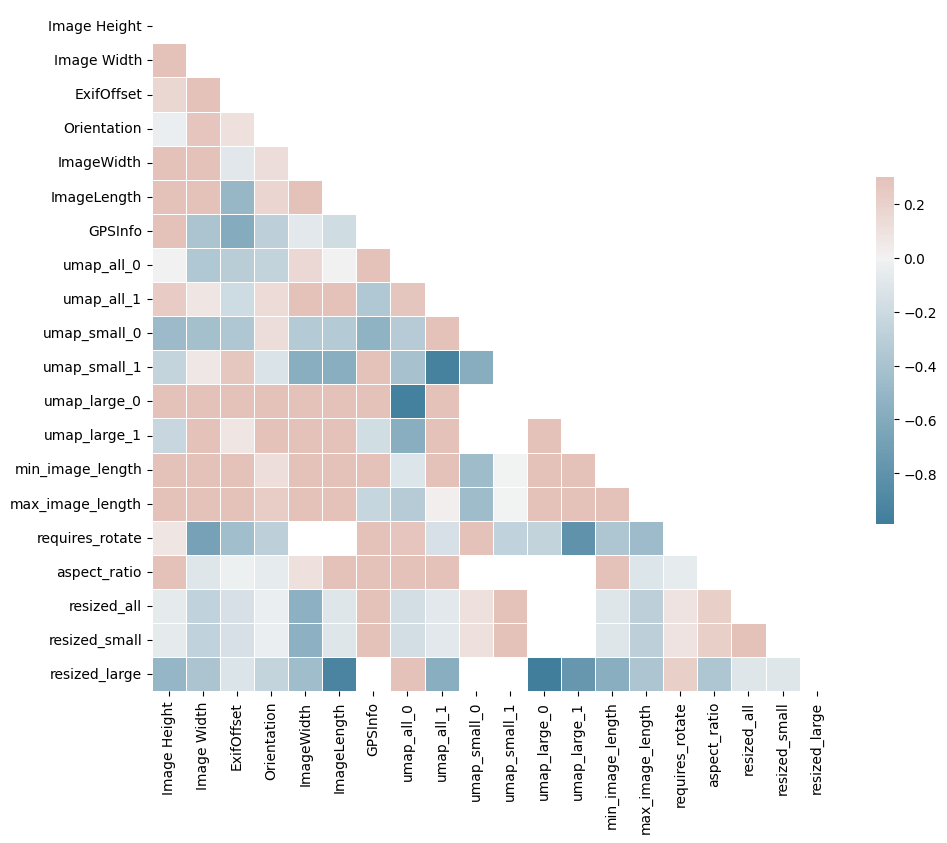

In [76]:
corr = umap.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Scatterplots

Resolution of two blue groups (umap small):
- Due to images being resized or not: No
- Due to amount of resizing: Possibly
    - Left cluster: 
        - **Image Size** == 4608, 2592; 1.15 increase to image. 
    - Right cluster: 
        - **Image Size** == 4032, 2268; 1.32 increase to image.
- Software: No
- Orientation: No

Resolution of two green groups (umap large):
- Due to images being resized or not: Probably

Resolution of two brown groups (umap large):
- Doe to images being resized or not: No
- Due to amount of resizing: No
- Due to Software: No
- Due to Front Facing vs Rear Facing Camera: Maybe, but not definitive:
    - **Top Group**: Image size == (3024, 4032) i.e. camera 1 portrait
    - **Bottom Group**: Image sizes == (2316, 3088), (3088, 2316) i.e. camera 2 portrait and landscape, (4032, 3024) i.e. camera 1 landscape
- Direction of rotate? 
    - If some have been taken rotated in different directions, this could have an effect on the noiseprint, as it's looking at camera dependencies. i.e. left vs right rotate for landscape, button bottom vs buttom top for portrait. 
    - Not reflected in meta data, not sure how this could be determined. Need to think about that. 

## Plots

In [115]:
def umap_scatter_plots(data, hue_name, hue):
    if len(hue) is 1:
        hue = hue*3
    
    fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(15,5), sharey=True)
    fig.suptitle('UMAP of Noiseprints coloured by ' +  hue_name)
    
    sns.scatterplot(ax=ax[0], data=data, x='umap_all_0', y='umap_all_1', hue = hue[0], alpha=0.2)#, palette='bright')
    ax[0].set_title('All')
    ax[0].legend_.remove()

    sns.scatterplot(ax=ax[1], data=data, x='umap_small_0', y='umap_small_1', hue = hue[1], alpha=0.2)#, palette='bright')
    ax[1].set_title('Smaller Aspect Ratio')
    ax[1].legend_.remove()

    sns.scatterplot(ax=ax[2], data=data, x='umap_large_0', y='umap_large_1', hue = hue[2], alpha=0.2)#, palette='bright')
    ax[2].set_title('Larger Aspect Ratio')

    sns.move_legend(ax[2], "upper left", bbox_to_anchor=(1, 1))

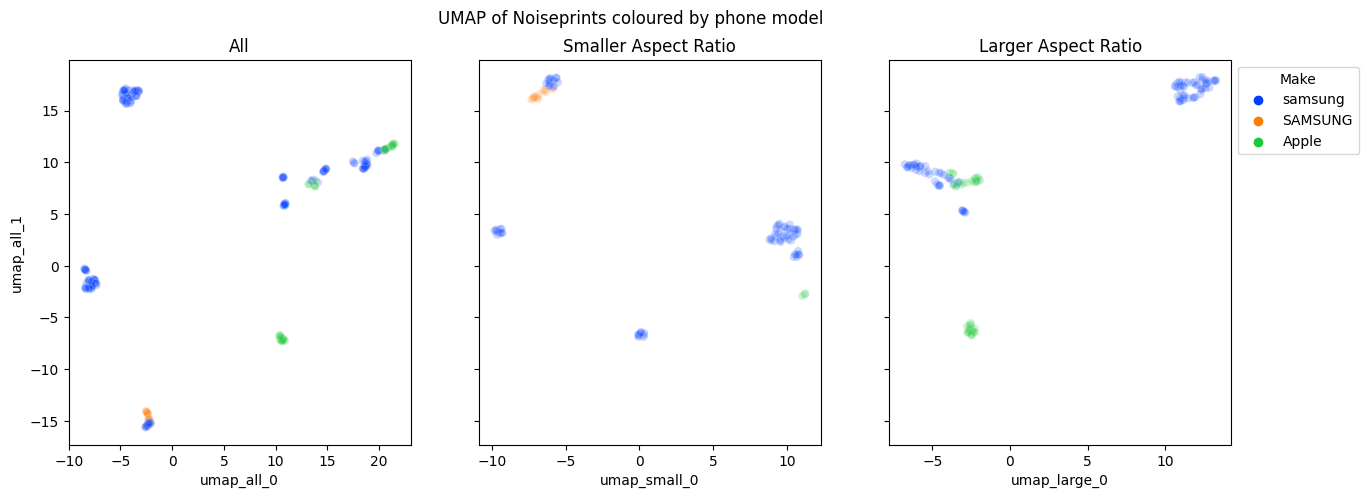

In [93]:
umap_scatter_plots(umap, 'phone model', ['Make'])

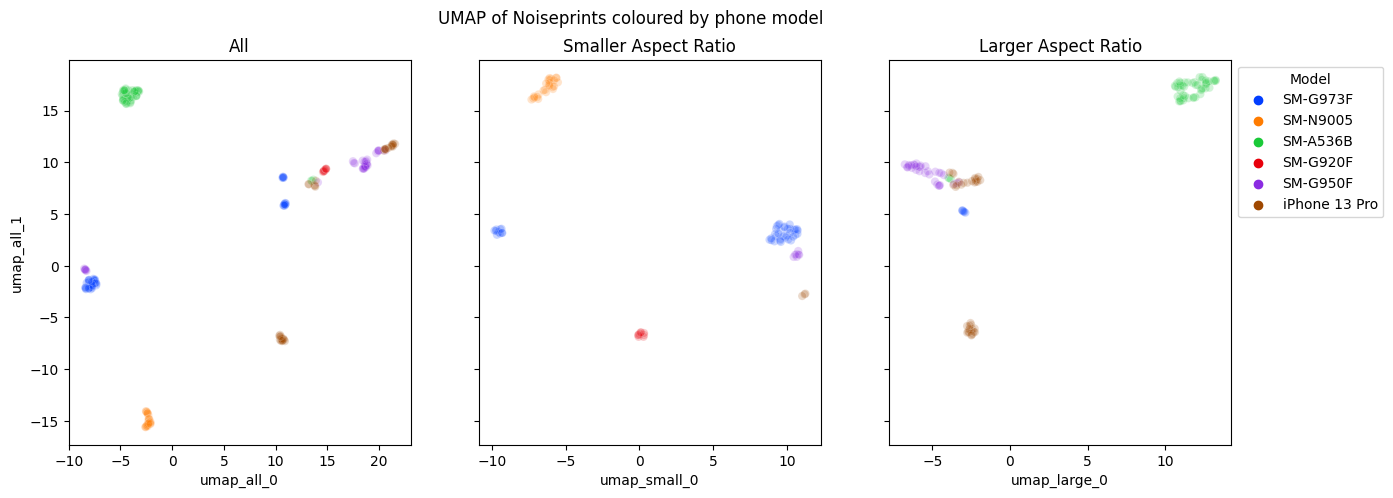

In [86]:
umap_scatter_plots(umap, 'phone model', ['Model'])

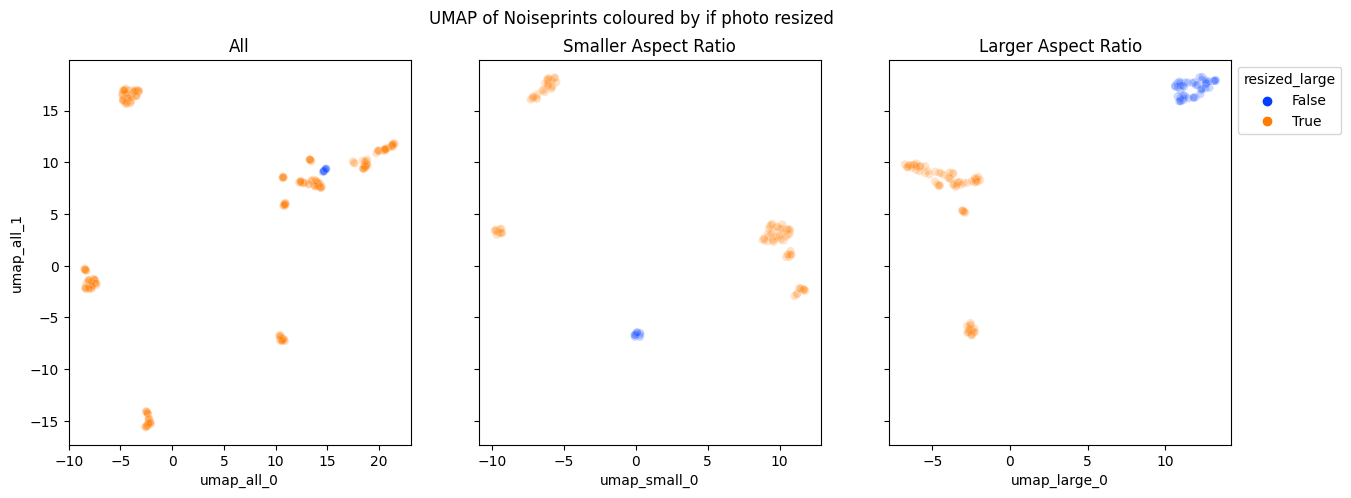

In [87]:
umap_scatter_plots(umap, 'if photo resized', ['resized_all', 'resized_small', 'resized_large'])

Look at methods of resizing ... 
- to smallest size rather than biggest? 

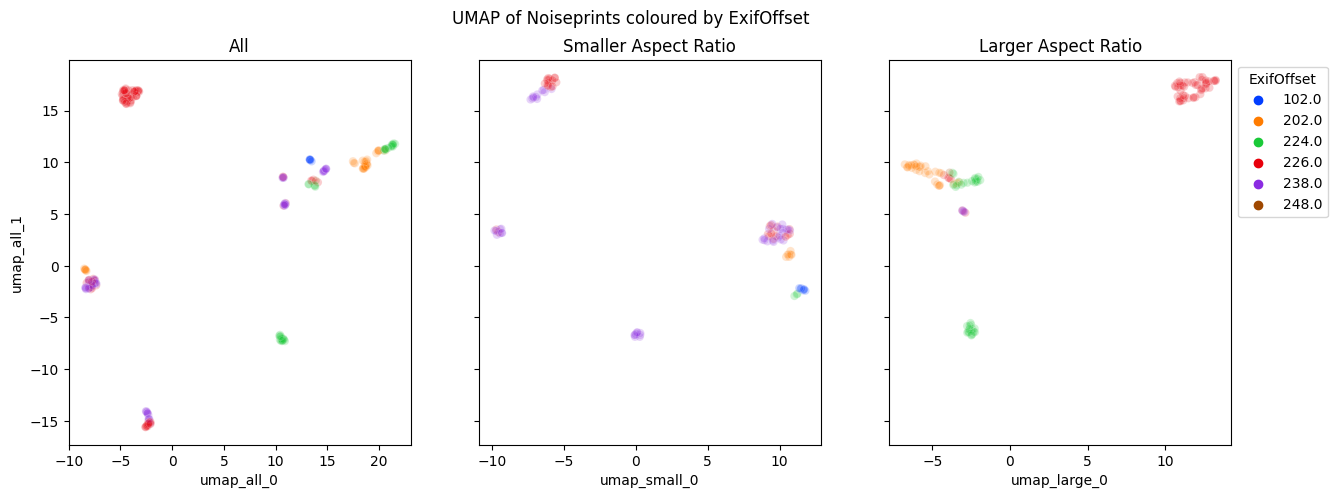

In [88]:
umap_scatter_plots(umap, 'ExifOffset', ['ExifOffset'])

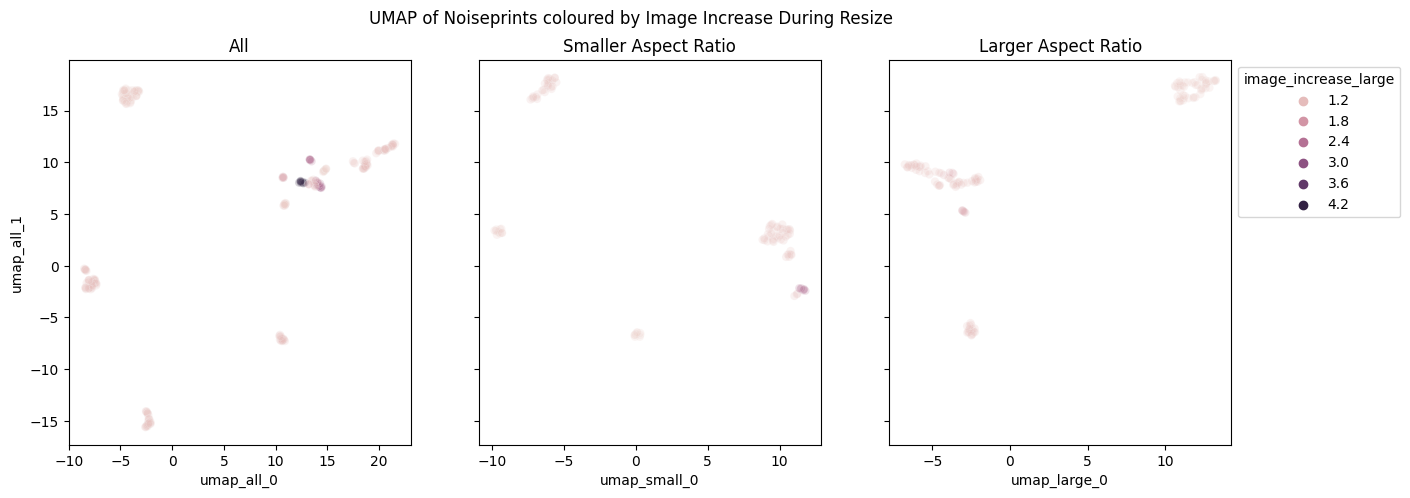

In [116]:
umap_scatter_plots(umap, 'Image Increase During Resize', ['image_increase_all', 'image_increase_all', 'image_increase_large'])

<AxesSubplot:xlabel='umap_large_0', ylabel='umap_large_1'>

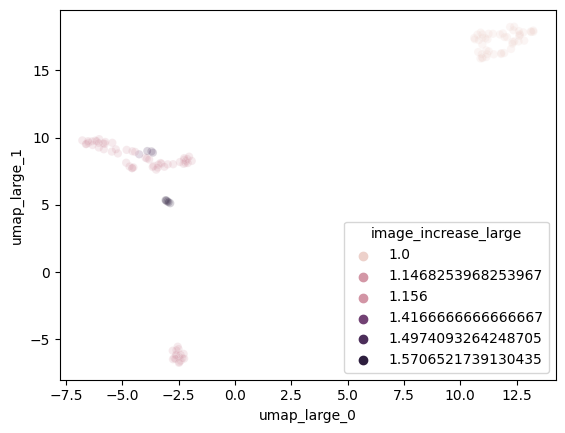

In [121]:
sns.scatterplot(data=umap[umap['umap_large_0'].notnull()], x='umap_large_0', y='umap_large_1', hue = 'image_increase_large', alpha=0.2)#, palette='bright')

<AxesSubplot:xlabel='umap_small_0', ylabel='umap_small_1'>

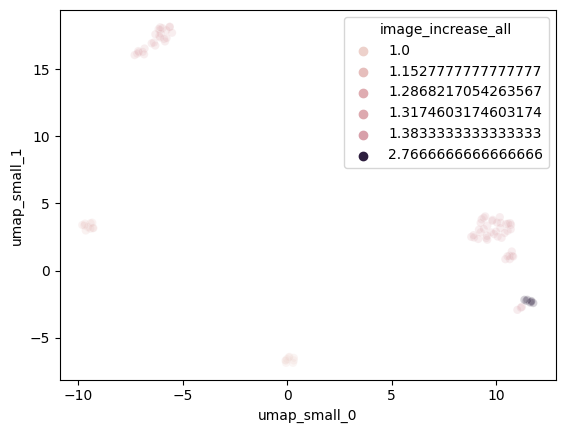

In [122]:
sns.scatterplot(data=umap[umap['umap_small_0'].notnull()], x='umap_small_0', y='umap_small_1', hue = 'image_increase_all', alpha=0.2)#, palette='bright')

<AxesSubplot:xlabel='umap_all_0', ylabel='umap_all_1'>

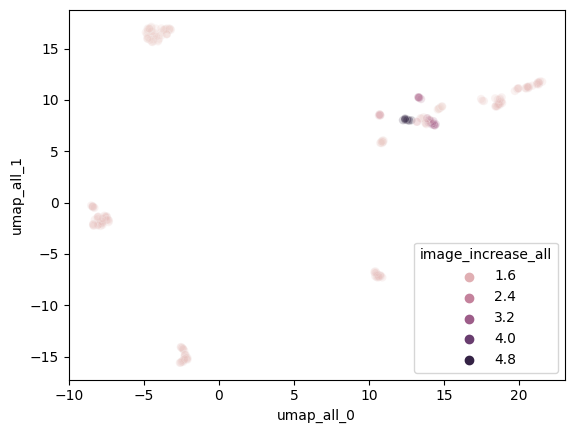

In [123]:
sns.scatterplot(data=umap[umap['umap_all_0'].notnull()], x='umap_all_0', y='umap_all_1', hue = 'image_increase_all', alpha=0.2)#, palette='bright')

## Investigating why groups have resolved as they have

In [143]:
umap.columns

Index(['Unnamed: 0', 'Filename', 'Image Size', 'Image Height', 'Image Width',
       'Image Format', 'Image Mode', 'ExifOffset', 'Make', 'Model', 'Software',
       'Orientation', 'DateTime', 'ImageWidth', 'ImageLength', 'GPSInfo',
       'HostComputer', 'umap_all_0', 'umap_all_1', 'umap_small_0',
       'umap_small_1', 'umap_large_0', 'umap_large_1', 'min_image_length',
       'max_image_length', 'requires_rotate', 'aspect_ratio', 'resized_all',
       'resized_small', 'resized_large', 'image_increase_all',
       'image_increase_large'],
      dtype='object')

In [146]:
umap[(umap['Model']=='iPhone 13 Pro') & (umap['umap_large_1'] < 0)].groupby(['HostComputer']).count()

,Unnamed: 0,Filename,Image Size,Image Height,Image Width,Image Format,Image Mode,ExifOffset,Make,Model,...,umap_large_1,min_image_length,max_image_length,requires_rotate,aspect_ratio,resized_all,resized_small,resized_large,image_increase_all,image_increase_large
HostComputer,,,,,,,,,,,,,,,,,,,,,
iPhone 13 Pro,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


In [147]:
umap[(umap['Model']=='iPhone 13 Pro') & (umap['umap_large_1'] > 0)].groupby(['HostComputer']).count()

,Unnamed: 0,Filename,Image Size,Image Height,Image Width,Image Format,Image Mode,ExifOffset,Make,Model,...,umap_large_1,min_image_length,max_image_length,requires_rotate,aspect_ratio,resized_all,resized_small,resized_large,image_increase_all,image_increase_large
HostComputer,,,,,,,,,,,,,,,,,,,,,
iPhone 13 Pro,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [142]:
umap[(umap['Model']=='iPhone 13 Pro') & (umap['umap_large_1'] < 0) & (umap['Image Size'] == '(3024, 4032)')]

,Unnamed: 0,Filename,Image Size,Image Height,Image Width,Image Format,Image Mode,ExifOffset,Make,Model,...,umap_large_1,min_image_length,max_image_length,requires_rotate,aspect_ratio,resized_all,resized_small,resized_large,image_increase_all,image_increase_large
200,iCloudPhotosConverted_IMG_0401.JPG,../iCloud_Photos_Converted/IMG_0401.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.581540,3024,4032,True,0.75,True,True,True,1.31746,1.146825
202,iCloudPhotosConverted_IMG_0406.JPG,../iCloud_Photos_Converted/IMG_0406.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.677220,3024,4032,True,0.75,True,True,True,1.31746,1.146825
205,iCloudPhotosConverted_IMG_0426.JPG,../iCloud_Photos_Converted/IMG_0426.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.079162,3024,4032,True,0.75,True,True,True,1.31746,1.146825
206,iCloudPhotosConverted_IMG_0432.JPG,../iCloud_Photos_Converted/IMG_0432.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.149653,3024,4032,True,0.75,True,True,True,1.31746,1.146825
208,iCloudPhotosConverted_IMG_0443.JPG,../iCloud_Photos_Converted/IMG_0443.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.290704,3024,4032,True,0.75,True,True,True,1.31746,1.146825
209,iCloudPhotosConverted_IMG_0446.JPG,../iCloud_Photos_Converted/IMG_0446.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.133031,3024,4032,True,0.75,True,True,True,1.31746,1.146825
217,iCloudPhotosConverted_IMG_0527.JPG,../iCloud_Photos_Converted/IMG_0527.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.426362,3024,4032,True,0.75,True,True,True,1.31746,1.146825
222,iCloudPhotosConverted_IMG_0653.JPG,../iCloud_Photos_Converted/IMG_0653.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.185725,3024,4032,True,0.75,True,True,True,1.31746,1.146825
223,iCloudPhotosConverted_IMG_0676.JPG,../iCloud_Photos_Converted/IMG_0676.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.382044,3024,4032,True,0.75,True,True,True,1.31746,1.146825
225,iCloudPhotosConverted_IMG_0700.JPG,../iCloud_Photos_Converted/IMG_0700.JPG,"(3024, 4032)",4032,3024,JPEG,RGB,224.0,Apple,iPhone 13 Pro,...,-6.474439,3024,4032,True,0.75,True,True,True,1.31746,1.146825


In [124]:
umap[(umap['Model']=='SM-A536B') & (umap['umap_large_0'] < 0)].groupby('resized_large').count()

,Unnamed: 0,Filename,Image Size,Image Height,Image Width,Image Format,Image Mode,ExifOffset,Make,Model,...,umap_large_0,umap_large_1,min_image_length,max_image_length,requires_rotate,aspect_ratio,resized_all,resized_small,image_increase_all,image_increase_large
resized_large,,,,,,,,,,,,,,,,,,,,,
True,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [125]:
umap[(umap['Model']=='SM-A536B') & (umap['umap_large_0'] > 0)].groupby('resized_large').count()

,Unnamed: 0,Filename,Image Size,Image Height,Image Width,Image Format,Image Mode,ExifOffset,Make,Model,...,umap_large_0,umap_large_1,min_image_length,max_image_length,requires_rotate,aspect_ratio,resized_all,resized_small,image_increase_all,image_increase_large
resized_large,,,,,,,,,,,,,,,,,,,,,
False,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [108]:
umap[(umap['Model']=='SM-G973F') & (umap['umap_small_0'] < 0)].groupby('Image Size').count()

,Unnamed: 0,Filename,Image Height,Image Width,Image Format,Image Mode,ExifOffset,Make,Model,Software,...,umap_small_1,umap_large_0,umap_large_1,min_image_length,max_image_length,requires_rotate,aspect_ratio,resized_all,resized_small,resized_large
Image Size,,,,,,,,,,,,,,,,,,,,,
"(4608, 2592)",10,10,10,10,10,10,10,10,10,10,...,10,0,0,10,10,10,10,10,10,10


In [109]:
umap[(umap['Model']=='SM-G973F') & (umap['umap_small_0'] > 0)].groupby('Image Size').count()

,Unnamed: 0,Filename,Image Height,Image Width,Image Format,Image Mode,ExifOffset,Make,Model,Software,...,umap_small_1,umap_large_0,umap_large_1,min_image_length,max_image_length,requires_rotate,aspect_ratio,resized_all,resized_small,resized_large
Image Size,,,,,,,,,,,,,,,,,,,,,
"(4032, 2268)",33,33,33,33,33,33,33,33,33,33,...,33,0,0,33,33,33,33,33,33,33


Look at the two blue groups in umap_small. -- what are the differences??? 